# Maternal Health Risk

Dataset Link

https://archive.ics.uci.edu/ml/datasets/Maternal+Health+Risk+Data+Set

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import set_config
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12.0, 9.0]
plt.rcParams['font.size'] = 12
set_config(display='diagram')                       # HTML representation of Pipeline (display diagram)
path = os.getcwd()                                  # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
file = os.path.join('datasets', 'Maternal Health Risk Data Set.csv')
df = pd.read_csv(file)

# Head and Tail

In [4]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [5]:
df.shape                                        

(1014, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


# Exploratory Data Analysis

create age categories, 9-15 => children, 15-25 => youth, 25-65 => adults and > 65 yrs => seniors

In [7]:
df['AgeCat'] = pd.cut(df['Age'], [9, 15, 25, 65, np.inf], labels=['Children', 'Youth', 'Adults', 'Seniors'])
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,AgeCat
0,25,130,80,15.0,98.0,86,high risk,Youth
1,35,140,90,13.0,98.0,70,high risk,Adults
2,29,90,70,8.0,100.0,80,high risk,Adults
3,30,140,85,7.0,98.0,70,high risk,Adults
4,35,120,60,6.1,98.0,76,low risk,Adults


In [8]:
# bar plot helper function
def plot_bar(df, x, y, hue, xlabel=None, ylabel=None, title=None):

    # set plot theme and color codes
    sns.set_theme(style='whitegrid')
    sns.set_color_codes('pastel')

    # Initialize the matplotlib figure
    fig, ax = plt.subplots()

    # plot bar chart
    sns.barplot(
        x=x, y=y,
        hue=hue, 
        data=df, ci=None,
        ax=ax
    )

    sns.despine(left=True, bottom=True)

    # matplotlib axis label
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    # plot legend
    ax.legend(loc=1)

    return plot_bar

<function __main__.plot_bar(df, x, y, hue, xlabel=None, ylabel=None, title=None)>

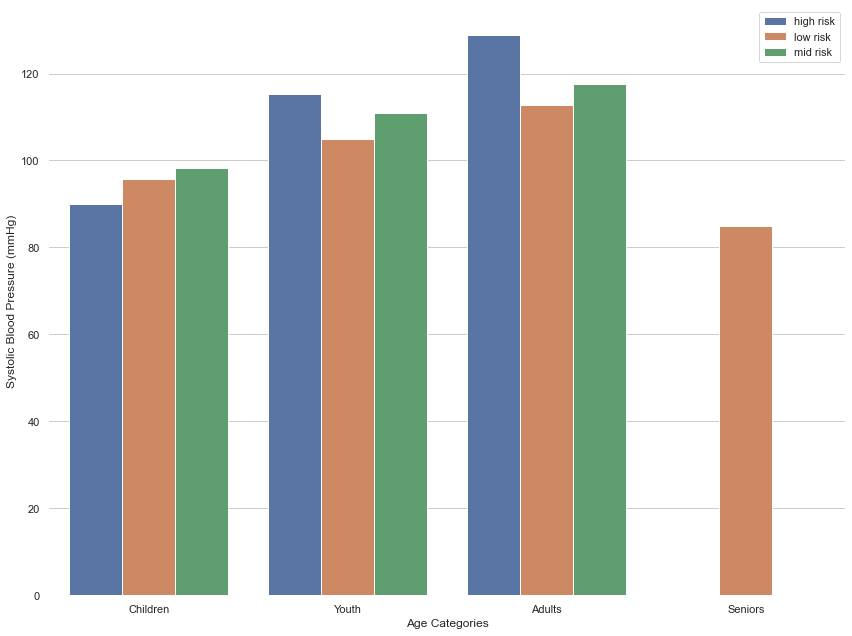

In [9]:
plot_bar(df=df, x='AgeCat', y='SystolicBP', 
         xlabel='Age Categories', ylabel='Systolic Blood Pressure (mmHg)', 
         hue='RiskLevel')

<function __main__.plot_bar(df, x, y, hue, xlabel=None, ylabel=None, title=None)>

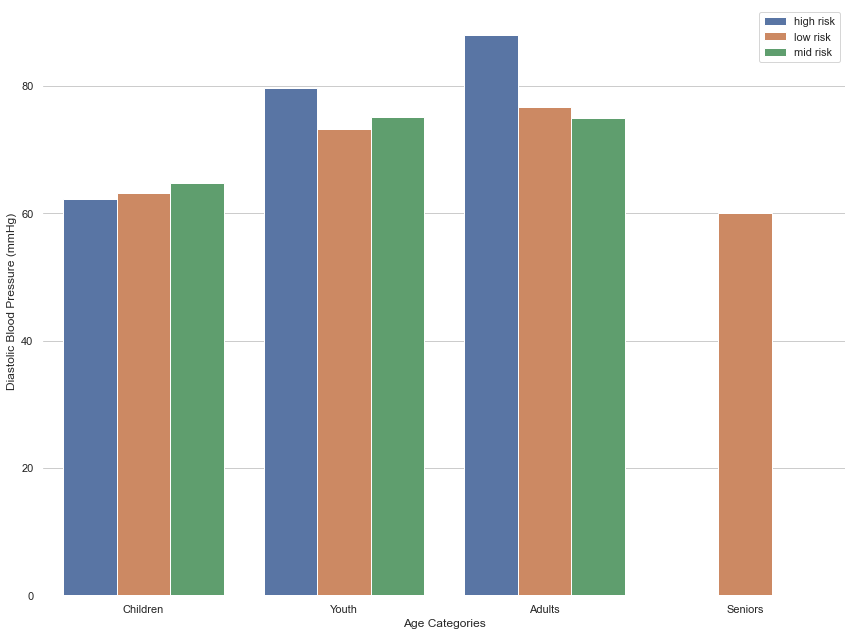

In [10]:
plot_bar(df=df, x='AgeCat', y='DiastolicBP', 
         xlabel='Age Categories', ylabel='Diastolic Blood Pressure (mmHg)', 
         hue='RiskLevel')

<function __main__.plot_bar(df, x, y, hue, xlabel=None, ylabel=None, title=None)>

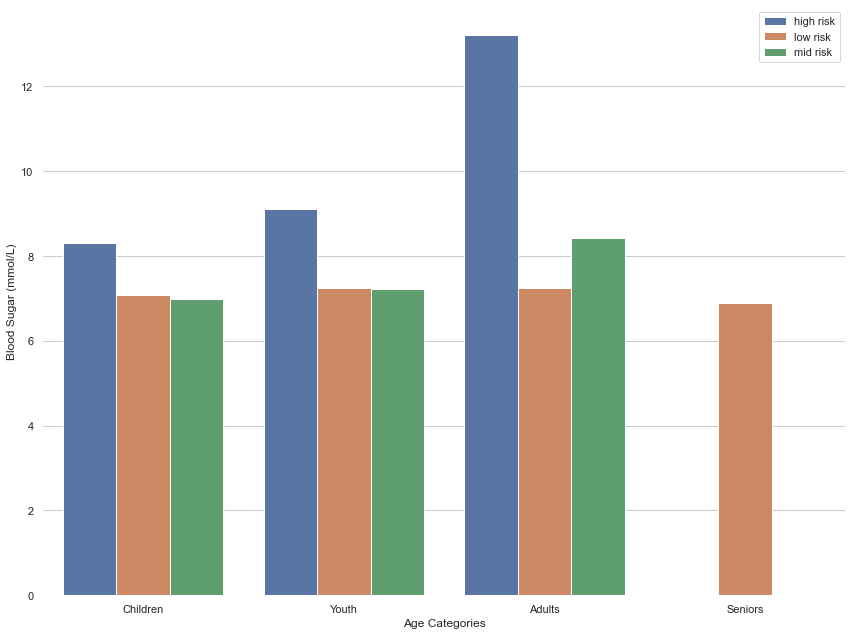

In [11]:
plot_bar(df=df, x='AgeCat', y='BS', 
         xlabel='Age Categories', ylabel='Blood Sugar (mmol/L)', 
         hue='RiskLevel')

<function __main__.plot_bar(df, x, y, hue, xlabel=None, ylabel=None, title=None)>

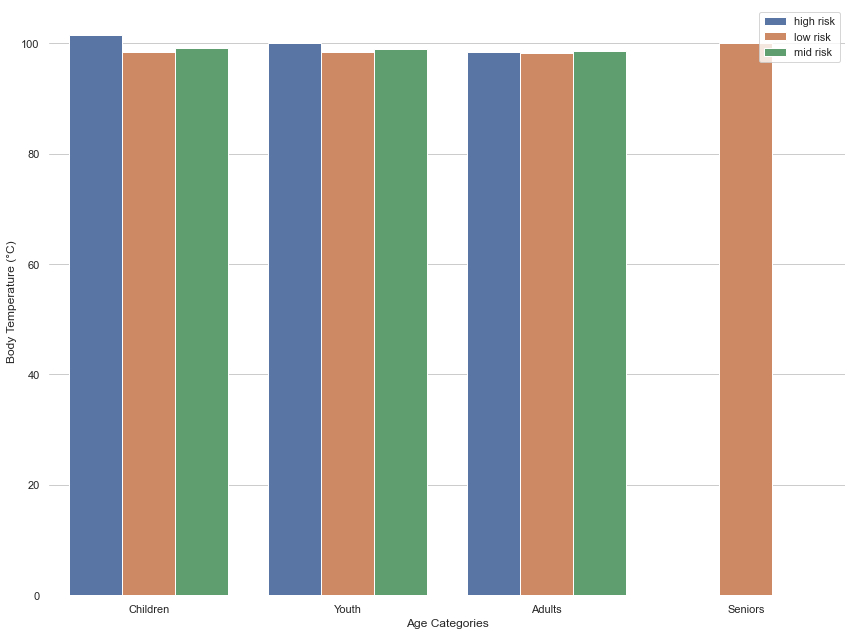

In [12]:
plot_bar(df=df, x='AgeCat', y='BodyTemp', 
         xlabel='Age Categories', ylabel='Body Temperature (°C)', 
         hue='RiskLevel')

<function __main__.plot_bar(df, x, y, hue, xlabel=None, ylabel=None, title=None)>

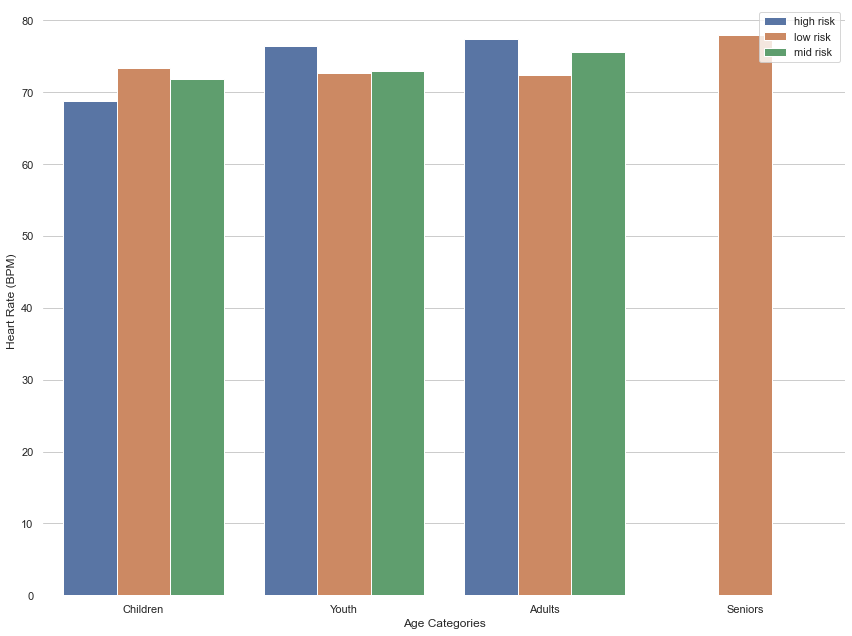

In [13]:
plot_bar(df=df, x='AgeCat', y='HeartRate', 
         xlabel='Age Categories', ylabel='Heart Rate (BPM)', 
         hue='RiskLevel')

In [14]:
df.describe()                                                   

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


# Correlation Coefficient

In [15]:
corr_matrix = df.corr()
corr_matrix

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000


In [16]:
corr_matrix.shape

(6, 6)

plot heatmap - absolute value(0-0.3; weak/no relationship, 0.3-0.7; moderate, > 0.7 strong correlation)

<AxesSubplot:>

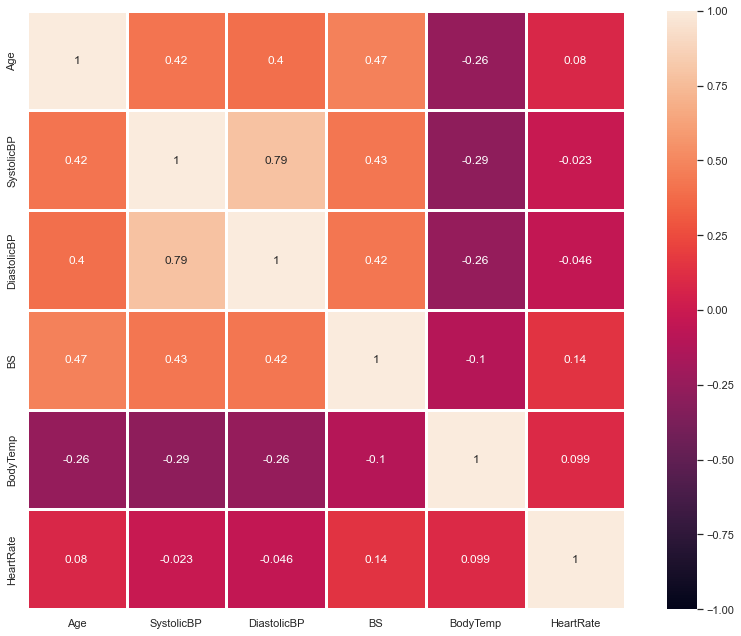

In [17]:
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, linewidths=3)

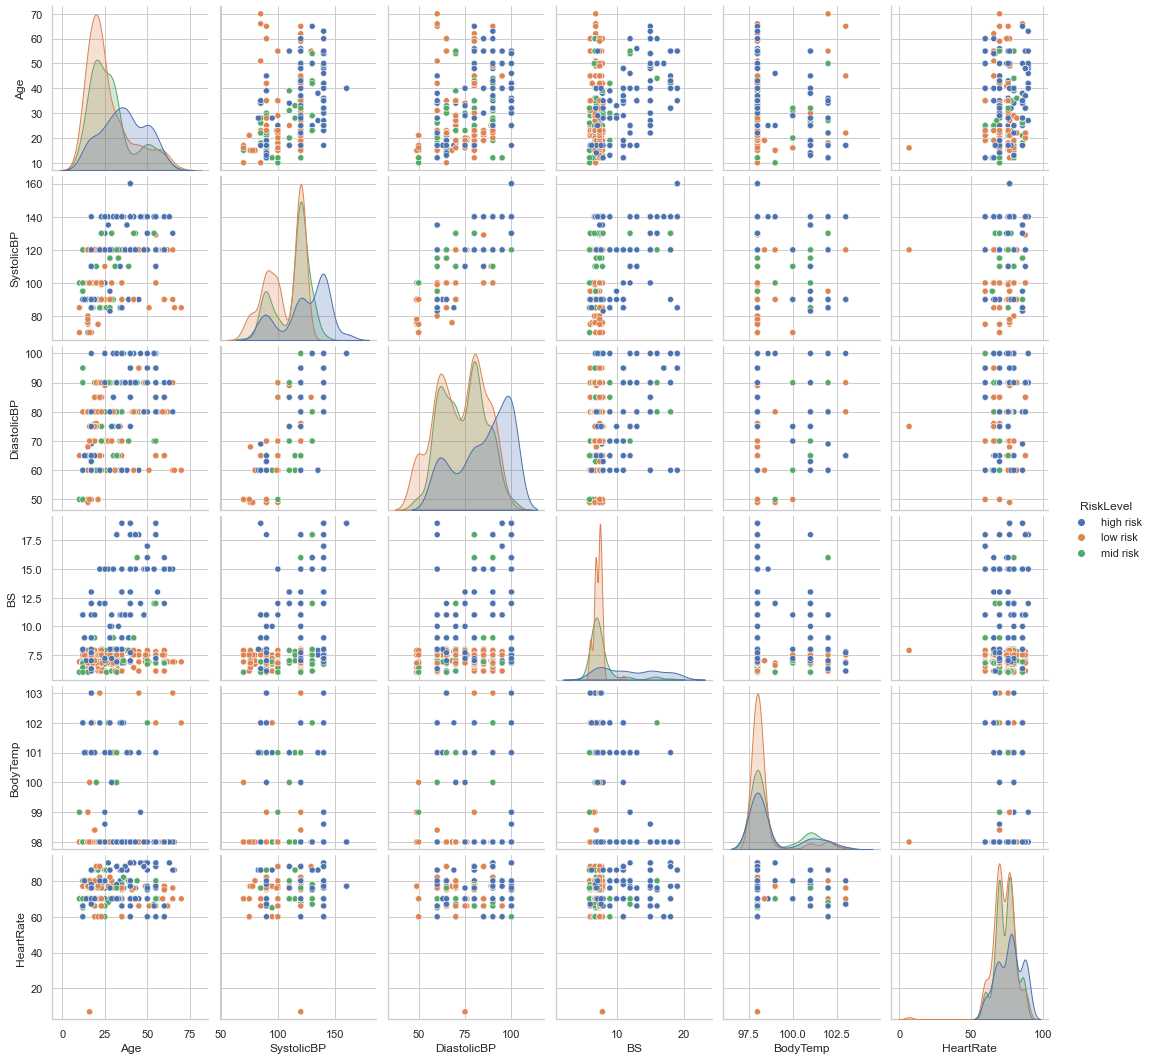

In [18]:
sns.pairplot(df, hue='RiskLevel')                            

# Missing Values Exploration

In [19]:
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
AgeCat         0
dtype: int64

# Data Splitting

In [20]:
from sklearn.model_selection import train_test_split

X = df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'AgeCat']]       # select features
y = df['RiskLevel']                                                                         # select target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Features dimension: {0} ==> Target dimensions: {1}'.format(X.shape, y.shape))
print('X train dimensions: {0} ==> y train dimensions: {1}'.format(X_train.shape, y_train.shape))
print('X test dimensions: {0} ==> y test dimensions: {1}'.format(X_test.shape, y_test.shape))

Features dimension: (1014, 7) ==> Target dimensions: (1014,)
X train dimensions: (811, 7) ==> y train dimensions: (811,)
X test dimensions: (203, 7) ==> y test dimensions: (203,)


# Pipeline

Linear Support Vector Classifier

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, QuantileTransformer
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

# create the preprocessing pipelines for both numeric and categorical data
numeric_features = X.select_dtypes(include=np.number).columns
numeric_transformer = Pipeline(steps=[
    ('qt', QuantileTransformer())
])

categorical_feature = X.select_dtypes(include='category').columns
categorical_transformer = Pipeline(steps=[
    ('ordenc', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_feature)
    ]
)

# Append classifier to preprocessing pipeline to have a full prediction pipeline.
lsv_clf = Pipeline(steps=[
    ('preprocessor', preprocessor), ('lsvc', LinearSVC(random_state=0))
])

lsv_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer())]),
                                                  Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['AgeCat'], dtype='object'))])),
                ('lsvc', LinearSVC(random_state=0))])

In [22]:
print(f"Coeffient: {lsv_clf.named_steps['lsvc'].coef_}")
print('\n')
print(f"Intercept: {lsv_clf.named_steps['lsvc'].intercept_}")

Coeffient: [[-0.13264902  0.8523503   0.63997492  1.626783    0.77663798  0.40933718
  -0.08967279]
 [-0.28795518 -1.43802962  0.31587273 -0.56803798 -0.87550478 -0.38071269
   0.02276719]
 [ 0.3075234   0.71050519 -0.668134   -0.73463901  0.30531014 -0.04108371
   0.05288324]]


Intercept: [-2.30871535  1.10968308 -0.26840448]


In [23]:
# helper fucntion to display model test score
def display_test_score(classifier):
    print('model test score: %.2f' % classifier.score(X_test, y_test))

Linear SVC Test Score

In [24]:
display_test_score(lsv_clf)

model test score: 0.64


KNeighbors Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Append classifier to preprocessing pipeline to have a full prediction pipeline.
knn_clf = Pipeline(steps=[
    ('preprocessor', preprocessor), ('KnnC', KNeighborsClassifier())
])

knn_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer())]),
                                                  Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['AgeCat'], dtype='object'))])),
                ('KnnC', KNeighborsClassifier())])

KNN Model Score

In [26]:
display_test_score(knn_clf)

model test score: 0.67


Support Vector Classifier

In [27]:
from sklearn.svm import SVC

# Append classifier to preprocessing pipeline to have a full prediction pipeline.
svc = Pipeline(steps=[
    ('preprocessor', preprocessor), ('svc', SVC(random_state=0))
])

svc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer())]),
                                                  Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['AgeCat'], dtype='object'))])),
                ('svc', SVC(random_state=0))])

SVC Test Score 

In [28]:
display_test_score(svc)

model test score: 0.63


Ensemble Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Append classifier to preprocessing pipeline to have a full prediction pipeline.
rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor), ('rfc', RandomForestClassifier(random_state=0))
])

rf_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer())]),
                                                  Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['AgeCat'], dtype='object'))])),
                ('rfc', RandomForestClassifier(random_state=0))])

Random Forest Classifier Test Score

In [30]:
display_test_score(rf_clf)

model test score: 0.83


# Hyper-parameter tuning

In [31]:
from sklearn.model_selection import GridSearchCV

estimator = rf_clf
param_grid = {
    'rfc__n_estimators': np.arange(1, 101),
    'rfc__criterion' : ['gini', 'entropy']
}

scoring = 'accuracy'

rfc_gscv = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring=scoring, n_jobs=-1,
                        refit=True, return_train_score=True)

In [32]:
rfc_gscv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('qt',
                                                                                          QuantileTransformer())]),
                                                                         Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ordenc',
                                                                                          OrdinalEncoder())]),
                                                                         Index(['AgeCat'], dtype='object'))])),
                                       ('rfc',
                                        RandomForestClassifier(ran...
                         'rfc__n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])},
             return_train_score=True, scoring='accuracy')

In [33]:
sorted_keys = sorted(rfc_gscv.cv_results_.keys())
sorted_keys

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_rfc__criterion',
 'param_rfc__n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [34]:
rfc_gscv_results = rfc_gscv.cv_results_
rfc_cvresults_df = pd.DataFrame(data=rfc_gscv_results)
rfc_cvresults_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfc__criterion,param_rfc__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.032949,0.002943,0.010950,0.001131,gini,1,"{'rfc__criterion': 'gini', 'rfc__n_estimators'...",0.717791,0.722222,0.777778,...,0.743558,0.023872,200,0.875000,0.876733,0.869029,0.864407,0.873652,0.871764,0.004480
1,0.038856,0.001356,0.011444,0.001195,gini,2,"{'rfc__criterion': 'gini', 'rfc__n_estimators'...",0.717791,0.685185,0.833333,...,0.769484,0.060001,198,0.901235,0.890601,0.882897,0.876733,0.884438,0.887181,0.008297
2,0.038491,0.001706,0.011149,0.001358,gini,3,"{'rfc__criterion': 'gini', 'rfc__n_estimators'...",0.760736,0.728395,0.820988,...,0.789184,0.041734,196,0.927469,0.930663,0.916795,0.904468,0.912173,0.918314,0.009675
3,0.039078,0.001154,0.010469,0.001365,gini,4,"{'rfc__criterion': 'gini', 'rfc__n_estimators'...",0.754601,0.716049,0.845679,...,0.804007,0.059517,194,0.936728,0.929122,0.926040,0.916795,0.918336,0.925404,0.007301
4,0.042449,0.004024,0.012445,0.003081,gini,5,"{'rfc__criterion': 'gini', 'rfc__n_estimators'...",0.779141,0.728395,0.845679,...,0.805211,0.046135,193,0.939815,0.935285,0.930663,0.921418,0.930663,0.931569,0.006107


In [35]:
rfc_cvresults_df[['param_rfc__n_estimators', 'param_rfc__criterion', 'mean_train_score', 'mean_test_score']]

,param_rfc__n_estimators,param_rfc__criterion,mean_train_score,mean_test_score
0,1,gini,0.871764,0.743558
1,2,gini,0.887181,0.769484
2,3,gini,0.918314,0.789184
3,4,gini,0.925404,0.804007
4,5,gini,0.931569,0.805211
...,...,...,...,...
195,96,entropy,0.940817,0.823714
196,97,entropy,0.940817,0.822487
197,98,entropy,0.940817,0.822487
198,99,entropy,0.940817,0.823714
